In [16]:
# TASK 1 : Load & Explore the Data
# Import library
import pandas as pd

# Load dataset
df = pd.read_csv("streamworks_user_data.csv")

# Converting float dtype to integer
df['age'] = df['age'].fillna(0).astype(int)
df['user_id'] = df['user_id'].fillna(0).astype(int)
df['complaints_raised'] = df['complaints_raised'].fillna(0).astype(int)
df['is_churned'] = df['is_churned'].fillna(0).astype(int)


df['age'] = df['age'].astype(int)
df['user_id'] = df['user_id'].astype(int)
df['complaints_raised'] = df['complaints_raised'].astype(int)
df['is_churned'] = df['is_churned'].astype(int)


# Display first 5 rows
print("----- First 5 Rows of Entire Dataframe -----")
print(df.head())

# 1. Check structure and data types
print("\n----- Dataset Info -----")
print(df.info())

# 2. Summary statistics for numeric columns
print("\n----- Summary Statistics -----")
print(df.describe())

# 3. Value counts for categorical columns
print("\n----- Gender Distribution -----")
print(df['gender'].value_counts())

print("\n----- Subscription Type Distribution -----")
print(df['subscription_type'].value_counts())

print("\n----- Country Distribution -----")
print(df['country'].value_counts())

# 4. Check for missing values
print("\n----- Missing Values by Column -----")
print(df.isnull().sum())


----- First 5 Rows of Entire Dataframe -----
   user_id  age  gender signup_date last_active_date  country  \
0     1001   56   Other    02-04-25         13-07-25   France   
1     1002   69    Male    02-01-23         13-07-25    India   
2     1003   46    Male    21-08-22         13-07-25       UK   
3     1004   32   Other    14-09-23         13-07-25  Germany   
4     1005   60  Female    29-07-23         13-07-25    India   

  subscription_type  average_watch_hours  mobile_app_usage_pct  \
0          Standard                 42.6                  77.4   
1             Basic                 65.3                  98.0   
2           Premium                 40.1                  47.8   
3           Premium                  5.8                  53.2   
4          Standard                 32.7                  16.8   

   complaints_raised received_promotions referred_by_friend  is_churned  \
0                  1                  No                 No           1   
1                

----- Correlation Matrix (Numeric Variables) -----
                       user_id       age  average_watch_hours  \
user_id               1.000000 -0.007616            -0.011225   
age                  -0.007616  1.000000             0.034608   
average_watch_hours  -0.011225  0.034608             1.000000   
mobile_app_usage_pct -0.022286 -0.009843            -0.004899   
complaints_raised    -0.065788  0.028519            -0.013094   
is_churned           -0.002202 -0.008254            -0.004844   
monthly_fee          -0.046725  0.001199            -0.021213   

                      mobile_app_usage_pct  complaints_raised  is_churned  \
user_id                          -0.022286          -0.065788   -0.002202   
age                              -0.009843           0.028519   -0.008254   
average_watch_hours              -0.004899          -0.013094   -0.004844   
mobile_app_usage_pct              1.000000          -0.028135    0.016331   
complaints_raised                -0.028135 

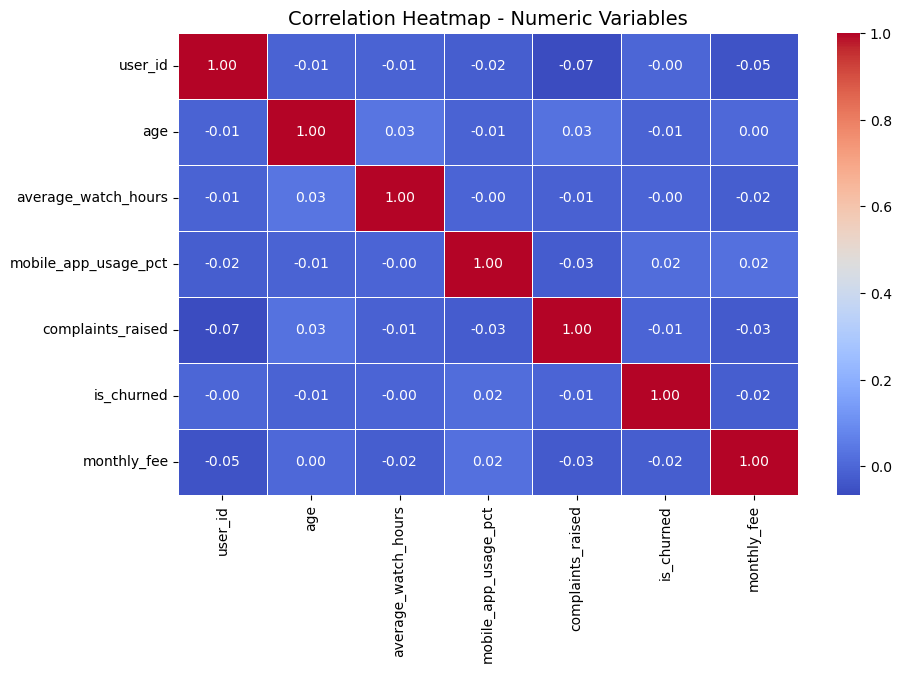

In [2]:
## TASK 1 : Load & Explore the Data

# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Generate correlation matrix for numeric columns
print("----- Correlation Matrix (Numeric Variables) -----")
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

# 2. Create a heatmap to visualise the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,        # display correlation values on the heatmap
    cmap="coolwarm",   # colour scheme
    fmt=".2f",         # limit decimal places
    linewidths=0.5
)
plt.title("Correlation Heatmap - Numeric Variables", fontsize=14)
plt.show()

In [3]:
## TASK 2: Clean & Prepare the Data
# Convert signup_date, last_active_date to datetime
# Before conversion: check data types
print("----- Data Types Before Conversion -----")
print(df.dtypes)

# Convert signup_date and last_active_date to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'], format='%d-%m-%y', errors='coerce')
df['last_active_date'] = pd.to_datetime(df['last_active_date'], format='%d-%m-%y', errors='coerce')

# After conversion: check data types again
print("\n----- Data Types After Conversion -----")
print(df.dtypes[['signup_date', 'last_active_date']])

# Display a few rows to confirm proper format
print("\n-----Date Columns -----")
print(df[['signup_date', 'last_active_date']].head())

----- Data Types Before Conversion -----
user_id                   int64
age                       int64
gender                   object
signup_date              object
last_active_date         object
country                  object
subscription_type        object
average_watch_hours     float64
mobile_app_usage_pct    float64
complaints_raised         int64
received_promotions      object
referred_by_friend       object
is_churned                int64
monthly_fee             float64
dtype: object

----- Data Types After Conversion -----
signup_date         datetime64[ns]
last_active_date    datetime64[ns]
dtype: object

-----Date Columns -----
  signup_date last_active_date
0  2025-04-02       2025-07-13
1  2023-01-02       2025-07-13
2  2022-08-21       2025-07-13
3  2023-09-14       2025-07-13
4  2023-07-29       2025-07-13


In [4]:
## TASk 2: Clean & Prepare the Data 

# Import libraries
from sklearn.preprocessing import LabelEncoder

# Create new features:
# tenure_days = days between signup and last_active_date
# Calculate tenure in days
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days

# Create loyalty flag
df['is_loyal'] = df['tenure_days'] > 180

# Print to verify
print("-----New Features-----")
print(df[['signup_date', 'last_active_date', 'tenure_days', 'is_loyal']].head())



-----New Features-----
  signup_date last_active_date  tenure_days  is_loyal
0  2025-04-02       2025-07-13        102.0     False
1  2023-01-02       2025-07-13        923.0      True
2  2022-08-21       2025-07-13       1057.0      True
3  2023-09-14       2025-07-13        668.0      True
4  2023-07-29       2025-07-13        715.0      True


In [5]:
## TASk 2: Clean & Prepare the Data 
## ---Handle missing values ---

print("\n----- Missing Values Before Cleaning -----")
print(df.isnull().sum())

# Fill numeric columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\n----- Missing Values After Cleaning -----")
print(df.isnull().sum())



----- Missing Values Before Cleaning -----
user_id                   0
age                       0
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         0
received_promotions       3
referred_by_friend        3
is_churned                0
monthly_fee             145
tenure_days               4
is_loyal                  0
dtype: int64

----- Missing Values After Cleaning -----
user_id                 0
age                     0
gender                  0
signup_date             2
last_active_date        2
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
is_loyal                0
dtype: int64


In [6]:
## TASk 2: Clean & Prepare the Data 
# ---Encode categorical features ---

# Label Encoding for binary categorical columns
le = LabelEncoder()
binary_cols = ['received_promotions', 'referred_by_friend']
for col in binary_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# One-hot Encoding for multi-category columns
df = pd.get_dummies(df,columns=['gender', 'subscription_type', 'country'], drop_first=True)

# --- Step 5: Final check ---
print("\n----- Dataset Info After Encoding -----")
print(df.info())

print("\n----- Encoded Columns Preview -----")
print(df.head())



----- Dataset Info After Encoding -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     1500 non-null   int64         
 1   age                         1500 non-null   int64         
 2   signup_date                 1498 non-null   datetime64[ns]
 3   last_active_date            1498 non-null   datetime64[ns]
 4   average_watch_hours         1500 non-null   float64       
 5   mobile_app_usage_pct        1500 non-null   float64       
 6   complaints_raised           1500 non-null   int64         
 7   received_promotions         1500 non-null   int64         
 8   referred_by_friend          1500 non-null   int64         
 9   is_churned                  1500 non-null   int64         
 10  monthly_fee                 1500 non-null   float64       
 11  tenure_days    

In [7]:
## TASK 3: Feature Engineering

# Creating new features:
# tenure_days, is_loyal, watch_per_fee_ratio, heavy_mobile_user
# a) tenure_days - Measures how long a user has been active
df['tenure_days'] = (df['last_active_date'] - df['signup_date']).dt.days

# b) is_loyal- Flag loyal users based on tenure (example: >180 days)
df['is_loyal'] = df['tenure_days'] > 180

# c) watch_per_fee_ratio - Measures engagement vs subscription fee

df['watch_per_fee_ratio'] = df['average_watch_hours'] / df['monthly_fee']

# d) heavy_mobile_user - Flag users who use the mobile app heavily (e.g., >70% usage).

df['heavy_mobile_user'] = df['mobile_app_usage_pct'] > 70

print("\n----- New Feature Columns Preview -----")
print(df[['tenure_days', 'is_loyal', 'watch_per_fee_ratio', 'heavy_mobile_user']].head())


----- New Feature Columns Preview -----
   tenure_days  is_loyal  watch_per_fee_ratio  heavy_mobile_user
0        102.0     False             3.876251               True
1        923.0      True            10.901503               True
2       1057.0      True             2.866333              False
3        668.0      True             0.414582              False
4        715.0      True             3.273273              False


In [8]:
## TASK 3: Feature Engineering

## Transforming variables : Normalisation or log transforms if needed

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Columns to transform
numeric_cols = ['average_watch_hours', 'complaints_raised', 'tenure_days']

# Log Transform first
for col in numeric_cols:
    df[col + '_log'] = np.log1p(df[col])  # log(1 + x)

# Normalise the log-transformed columns
scaler = MinMaxScaler()
df[[col + '_log_norm' for col in numeric_cols]] = scaler.fit_transform(df[[col + '_log' for col in numeric_cols]])

# Display
print("\n----- Log Transformed Columns Preview -----")
print(df[[col + '_log' for col in numeric_cols]].head())

print("\n----- Log Normalised Columns Preview -----")
print(df[[col + '_log_norm' for col in numeric_cols]].head())



----- Log Transformed Columns Preview -----
   average_watch_hours_log  complaints_raised_log  tenure_days_log
0                 3.775057               0.693147         4.634729
1                 4.194190               1.609438         6.828712
2                 3.716008               0.000000         6.964136
3                 1.916923               0.693147         6.505784
4                 3.517498               1.791759         6.573680

----- Log Normalised Columns Preview -----
   average_watch_hours_log_norm  complaints_raised_log_norm  \
0                      0.844986                    0.386853   
1                      0.950091                    0.898244   
2                      0.830178                    0.000000   
3                      0.379025                    0.386853   
4                      0.780398                    1.000000   

   tenure_days_log_norm  
0              0.625025  
1              0.972930  
2              0.994404  
3              0.921723  


In [9]:
## Discretisation/Binning: Grouping ages or watch time into buckets
# --- Age Binning ---
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['Teen', 'Young Adult', 'Adult', 'Mid-age', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# --- Watch Time Binning ---
watch_bins = [0, 10, 30, 60, 100]  # adjust max based on your data
watch_labels = ['Low', 'Medium', 'High', 'Very High']
df['watch_time_group'] = pd.cut(df['average_watch_hours'], bins=watch_bins, labels=watch_labels, include_lowest=True)

# --- Display first 10 rows ---
print("\n----- Age and Watch Time Groups Preview -----")
print(df[['age', 'age_group', 'average_watch_hours', 'watch_time_group']].head(10))


----- Age and Watch Time Groups Preview -----
   age    age_group  average_watch_hours watch_time_group
0   56      Mid-age                 42.6             High
1   69       Senior                 65.3        Very High
2   46        Adult                 40.1             High
3   32  Young Adult                  5.8              Low
4   60      Mid-age                 32.7             High
5   25  Young Adult                 40.0             High
6   38        Adult                 57.8             High
7   56      Mid-age                  9.0              Low
8   36        Adult                 11.6           Medium
9   40        Adult                 21.5           Medium


In [10]:
## TASK 3: Feature Engineering

## Interaction features: received_promotions AND low_watch_time
# Assume:
# received_promotions is 0/1
# average_watch_hours is numeric

# Create a flag for low watch time (e.g., < 20 hours)
df['low_watch_time'] = df['average_watch_hours'] < 20

# Interaction feature: received promotion AND low watch time
df['promo_low_watch'] = (df['received_promotions'] == 1) & (df['low_watch_time'])

# Convert boolean to 0/1 if needed
df['promo_low_watch'] = df['promo_low_watch'].astype(int)

# Display
print("\n----- Interaction Features -----")
print(df[['received_promotions', 'average_watch_hours', 'low_watch_time', 'promo_low_watch']].head(10))



----- Interaction Features -----
   received_promotions  average_watch_hours  low_watch_time  promo_low_watch
0                    0                 42.6           False                0
1                    0                 65.3           False                0
2                    0                 40.1           False                0
3                    1                  5.8            True                1
4                    0                 32.7           False                0
5                    0                 40.0           False                0
6                    0                 57.8           False                0
7                    0                  9.0            True                0
8                    0                 11.6            True                0
9                    1                 21.5           False                0


In [11]:
## TASK 3: Feature Engineering
# Feature selection:Drop redundant or low-variance features

from sklearn.feature_selection import VarianceThreshold

# --- Drop Low-Variance Features ---
# Features with variance below this threshold will be removed
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

# Fit selector to dataframe (only numeric columns)
numeric_cols = df.select_dtypes(include=[np.number]).columns
selector.fit(df[numeric_cols])

# List of low-variance columns
low_variance_cols = numeric_cols[~selector.get_support()]
print("\n----- Low-Variance Columns -----")
print(low_variance_cols)

# Drop low-variance columns
df = df.drop(columns=low_variance_cols)

# --- Drop Highly Correlated Features ---
numeric_cols = df.select_dtypes(include=[np.number]).columns  # re-select numeric columns

corr_matrix = df[numeric_cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_cols = [col for col in upper.columns if any(upper[col] > 0.9)]
print("\n----- Highly Correlated Columns to Drop -----")
print(high_corr_cols)

df = df.drop(columns=high_corr_cols)

# --- Display Remaining Columns ---
print("\n----- Remaining Columns After Feature Selection -----")
print(df.columns)



----- Low-Variance Columns -----
Index([], dtype='object')

----- Highly Correlated Columns to Drop -----
['average_watch_hours_log', 'complaints_raised_log', 'average_watch_hours_log_norm', 'complaints_raised_log_norm', 'tenure_days_log_norm']

----- Remaining Columns After Feature Selection -----
Index(['user_id', 'age', 'signup_date', 'last_active_date',
       'average_watch_hours', 'mobile_app_usage_pct', 'complaints_raised',
       'received_promotions', 'referred_by_friend', 'is_churned',
       'monthly_fee', 'tenure_days', 'is_loyal', 'gender_Male', 'gender_Other',
       'subscription_type_Premium', 'subscription_type_Standard',
       'country_France', 'country_Germany', 'country_India', 'country_UK',
       'country_USA', 'watch_per_fee_ratio', 'heavy_mobile_user',
       'tenure_days_log', 'age_group', 'watch_time_group', 'low_watch_time',
       'promo_low_watch'],
      dtype='object')


===== CHI-SQUARE TESTS + VISUALISATION =====

Feature: gender_Male
H0: gender_Male and churn are independent
H1: gender_Male and churn are not independent
Test Formula: χ² = Σ((Observed - Expected)² / Expected)
Test Output (χ² statistic): 0.9639
p-value: 0.3262
Threshold (alpha): 0.05
Test Conclusion: Fail to Reject H0
Statistical Conclusion: No significant association
Business Conclusion: gender_Male does not appear to influence churn; no immediate action needed.


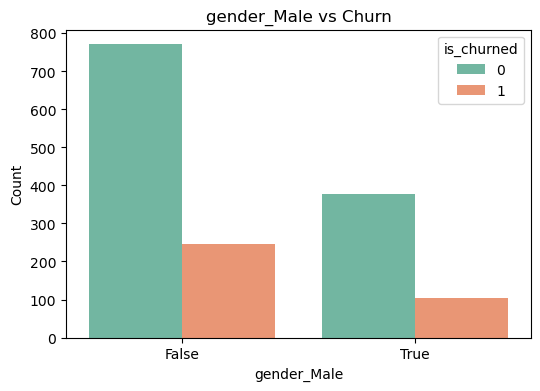


Feature: received_promotions
H0: received_promotions and churn are independent
H1: received_promotions and churn are not independent
Test Formula: χ² = Σ((Observed - Expected)² / Expected)
Test Output (χ² statistic): 2.6155
p-value: 0.1058
Threshold (alpha): 0.05
Test Conclusion: Fail to Reject H0
Statistical Conclusion: No significant association
Business Conclusion: received_promotions does not appear to influence churn; no immediate action needed.


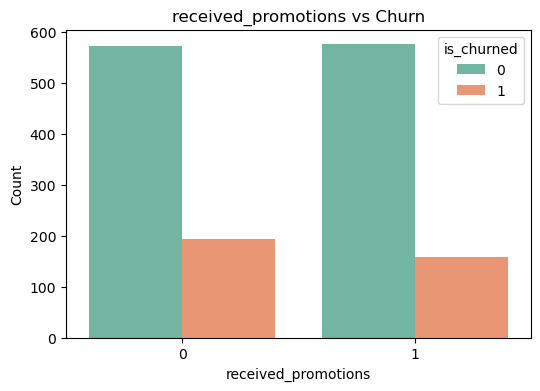


Feature: referred_by_friend
H0: referred_by_friend and churn are independent
H1: referred_by_friend and churn are not independent
Test Formula: χ² = Σ((Observed - Expected)² / Expected)
Test Output (χ² statistic): 0.7649
p-value: 0.3818
Threshold (alpha): 0.05
Test Conclusion: Fail to Reject H0
Statistical Conclusion: No significant association
Business Conclusion: referred_by_friend does not appear to influence churn; no immediate action needed.


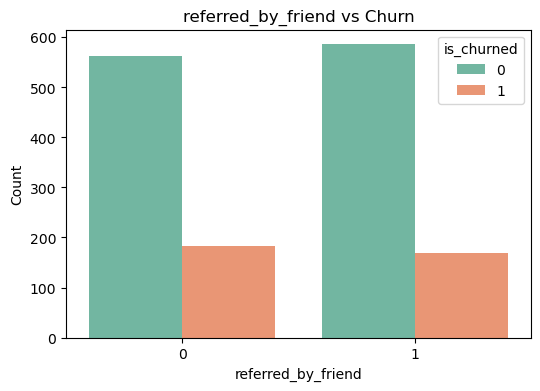


===== T-TEST: Average Watch Hours vs Churn =====
H0: Mean watch time of churned and active users is equal
H1: Mean watch time of churned and active users is different
Test Formula: t = (mean1 - mean2) / sqrt(s1^2/n1 + s2^2/n2)
Test Output (t-statistic): -0.1857
p-value: 0.8527
Threshold (alpha): 0.05
Test Conclusion: Fail to Reject H0
Statistical Conclusion: No significant difference in mean watch time
Business Conclusion: No significant difference; watch time alone may not explain churn.


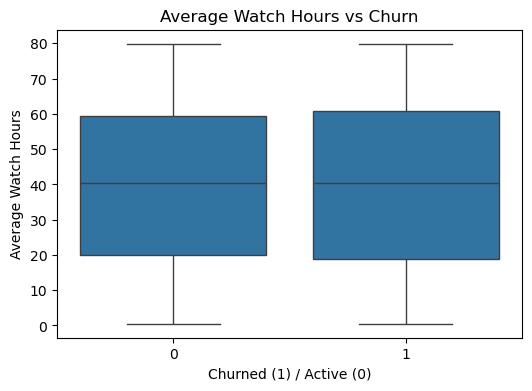


===== CORRELATION WITH CHURN =====

Feature: tenure_days_log
H0: No correlation between tenure_days_log and churn
H1: There is a correlation between tenure_days_log and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): 0.0220
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = 0.02
Business Conclusion: tenure_days_log has minimal correlation with churn; may not be a key factor.


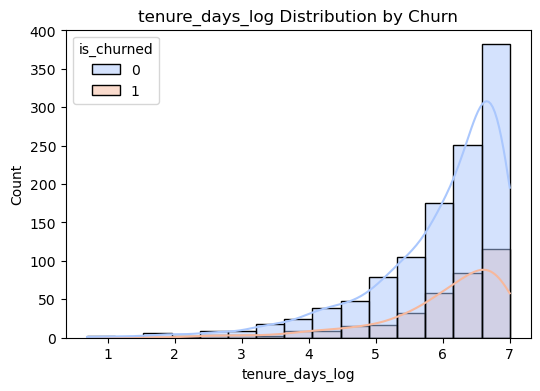


Feature: mobile_app_usage_pct
H0: No correlation between mobile_app_usage_pct and churn
H1: There is a correlation between mobile_app_usage_pct and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): 0.0164
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = 0.02
Business Conclusion: mobile_app_usage_pct has minimal correlation with churn; may not be a key factor.


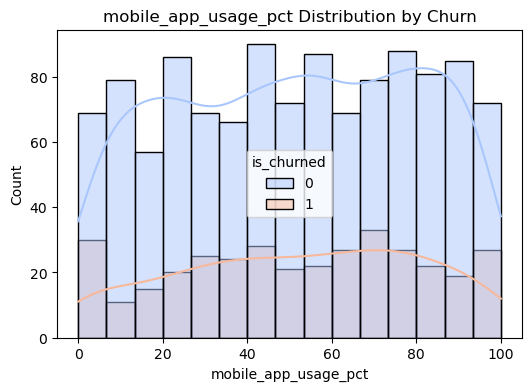


Feature: tenure_days
H0: No correlation between tenure_days and churn
H1: There is a correlation between tenure_days and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): 0.0116
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = 0.01
Business Conclusion: tenure_days has minimal correlation with churn; may not be a key factor.


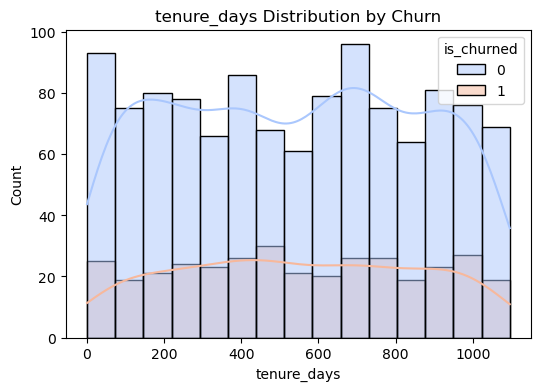


Feature: watch_per_fee_ratio
H0: No correlation between watch_per_fee_ratio and churn
H1: There is a correlation between watch_per_fee_ratio and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): -0.0011
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = -0.00
Business Conclusion: watch_per_fee_ratio has minimal correlation with churn; may not be a key factor.


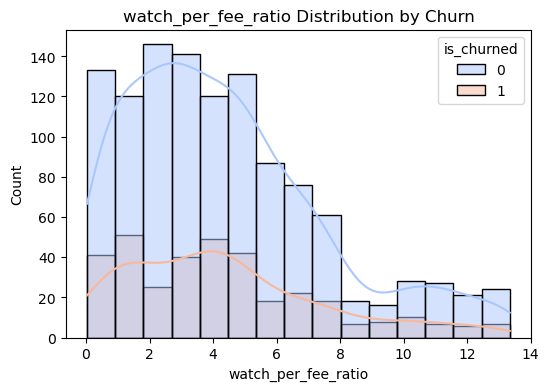


Feature: user_id
H0: No correlation between user_id and churn
H1: There is a correlation between user_id and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): -0.0022
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = -0.00
Business Conclusion: user_id has minimal correlation with churn; may not be a key factor.


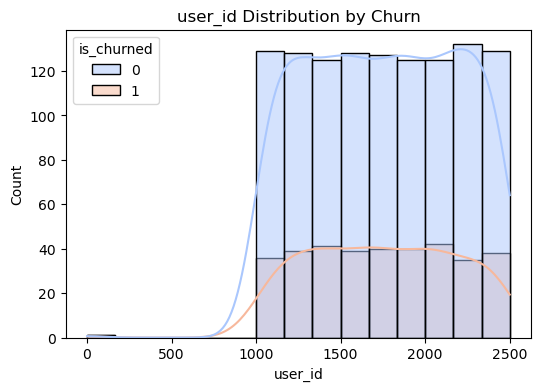


Feature: average_watch_hours
H0: No correlation between average_watch_hours and churn
H1: There is a correlation between average_watch_hours and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): -0.0048
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = -0.00
Business Conclusion: average_watch_hours has minimal correlation with churn; may not be a key factor.


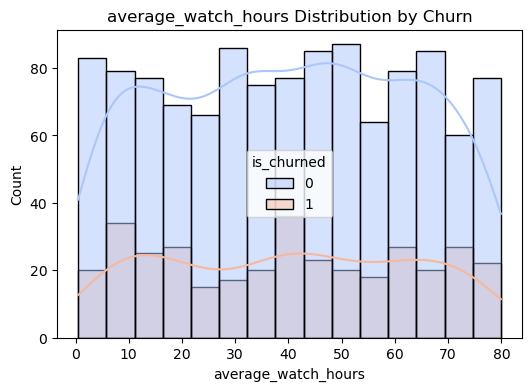


Feature: complaints_raised
H0: No correlation between complaints_raised and churn
H1: There is a correlation between complaints_raised and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): -0.0057
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = -0.01
Business Conclusion: complaints_raised has minimal correlation with churn; may not be a key factor.


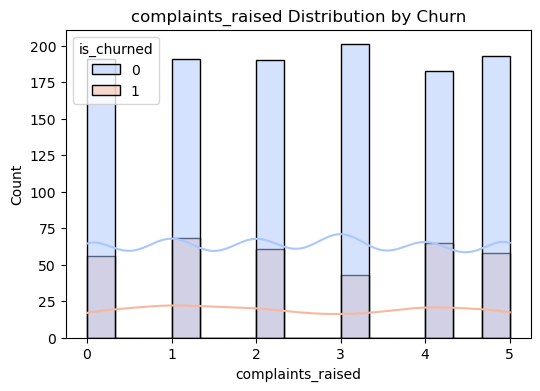


Feature: age
H0: No correlation between age and churn
H1: There is a correlation between age and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): -0.0083
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = -0.01
Business Conclusion: age has minimal correlation with churn; may not be a key factor.


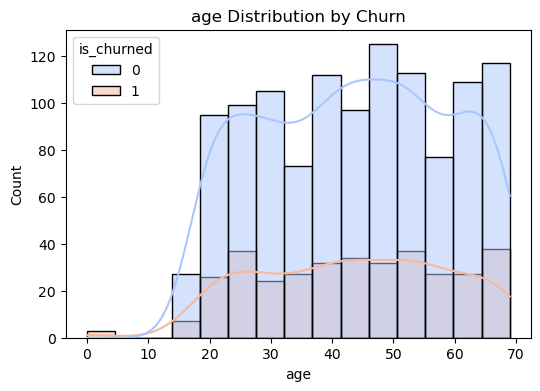


Feature: monthly_fee
H0: No correlation between monthly_fee and churn
H1: There is a correlation between monthly_fee and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): -0.0222
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = -0.02
Business Conclusion: monthly_fee has minimal correlation with churn; may not be a key factor.


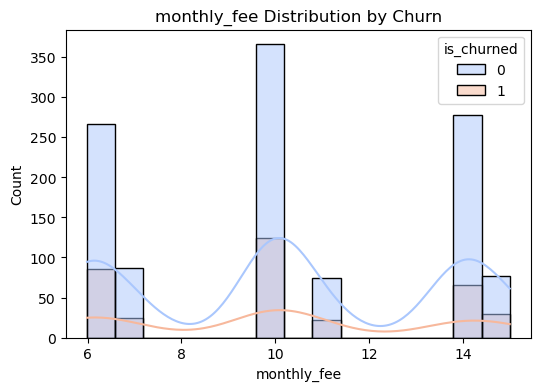


Feature: referred_by_friend
H0: No correlation between referred_by_friend and churn
H1: There is a correlation between referred_by_friend and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): -0.0242
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = -0.02
Business Conclusion: referred_by_friend has minimal correlation with churn; may not be a key factor.


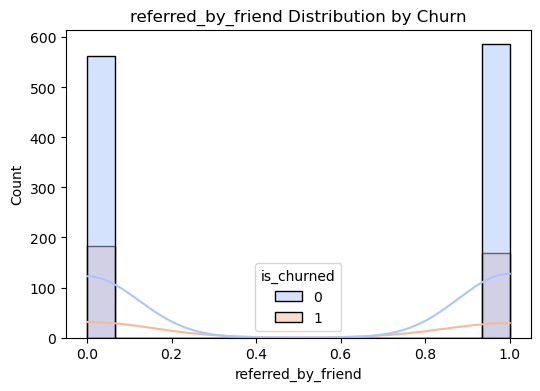


Feature: promo_low_watch
H0: No correlation between promo_low_watch and churn
H1: There is a correlation between promo_low_watch and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): -0.0366
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = -0.04
Business Conclusion: promo_low_watch has minimal correlation with churn; may not be a key factor.


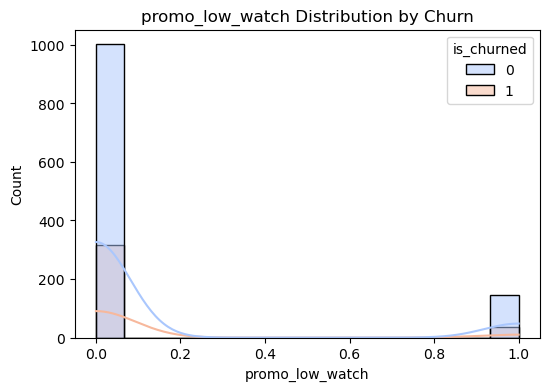


Feature: received_promotions
H0: No correlation between received_promotions and churn
H1: There is a correlation between received_promotions and churn
Test Formula: r = cov(X,Y) / (σ_X * σ_Y)
Test Output (r): -0.0433
Threshold (practical significance): |r| > 0.1
Test Conclusion: No significant correlation
Statistical Conclusion: Correlation coefficient r = -0.04
Business Conclusion: received_promotions has minimal correlation with churn; may not be a key factor.


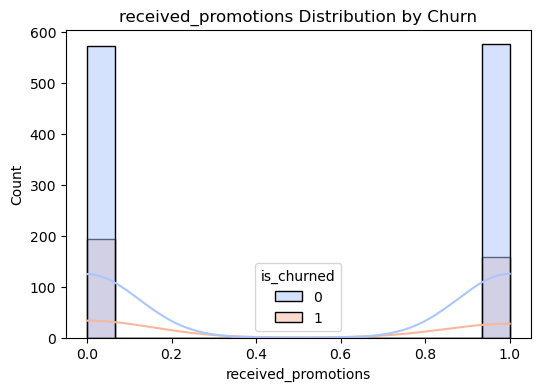

In [12]:
## TASK 4 : 4. Statistical Analysis & Insights
# Perform and summarise the following: Chi-square test,t-test,Correlation Analysis

import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

alpha = 0.05

# ================================
# 1. Chi-Square Tests + Bar Plots
# ================================
cat_features = ['gender_Male', 'received_promotions', 'referred_by_friend']

print("===== CHI-SQUARE TESTS + VISUALISATION =====")
for feature in cat_features:
    # --- 8 Statements ---
    H0 = f"{feature} and churn are independent"
    H1 = f"{feature} and churn are not independent"
    test_formula = "χ² = Σ((Observed - Expected)² / Expected)"
    
    table = pd.crosstab(df[feature], df['is_churned'])
    chi2_stat, p_value, dof, expected = chi2_contingency(table)
    test_conclusion = "Reject H0" if p_value < alpha else "Fail to Reject H0"
    stat_conclusion = "Significant association" if p_value < alpha else "No significant association"
    business_conclusion = (
        f"{feature} appears to influence churn; consider targeting strategies."
        if p_value < alpha else
        f"{feature} does not appear to influence churn; no immediate action needed."
    )
    
    print(f"\nFeature: {feature}")
    print(f"H0: {H0}")
    print(f"H1: {H1}")
    print(f"Test Formula: {test_formula}")
    print(f"Test Output (χ² statistic): {chi2_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Threshold (alpha): {alpha}")
    print(f"Test Conclusion: {test_conclusion}")
    print(f"Statistical Conclusion: {stat_conclusion}")
    print(f"Business Conclusion: {business_conclusion}")
    
    # --- Visualisation ---
    plt.figure(figsize=(6,4))
    sns.countplot(x=feature, hue='is_churned', data=df, palette='Set2')
    plt.title(f"{feature} vs Churn")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# =========================================
# 2. T-Test + Boxplot: Average Watch Hours
# =========================================
watch_churned = df[df['is_churned'] == 1]['average_watch_hours']
watch_active = df[df['is_churned'] == 0]['average_watch_hours']

H0 = "Mean watch time of churned and active users is equal"
H1 = "Mean watch time of churned and active users is different"
test_formula = "t = (mean1 - mean2) / sqrt(s1^2/n1 + s2^2/n2)"

t_stat, p_value = ttest_ind(watch_churned, watch_active, equal_var=False)
test_conclusion = "Reject H0" if p_value < alpha else "Fail to Reject H0"
stat_conclusion = "Mean watch time differs significantly" if p_value < alpha else "No significant difference in mean watch time"
business_conclusion = (
    "Churned users have different viewing patterns; consider engagement strategies."
    if p_value < alpha else
    "No significant difference; watch time alone may not explain churn."
)

print("\n===== T-TEST: Average Watch Hours vs Churn =====")
print(f"H0: {H0}")
print(f"H1: {H1}")
print(f"Test Formula: {test_formula}")
print(f"Test Output (t-statistic): {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Threshold (alpha): {alpha}")
print(f"Test Conclusion: {test_conclusion}")
print(f"Statistical Conclusion: {stat_conclusion}")
print(f"Business Conclusion: {business_conclusion}")

# --- Boxplot ---
plt.figure(figsize=(6,4))
sns.boxplot(x='is_churned', y='average_watch_hours', data=df)
plt.title('Average Watch Hours vs Churn')
plt.xlabel('Churned (1) / Active (0)')
plt.ylabel('Average Watch Hours')
plt.show()

# =====================================
# 3. Correlation Analysis + Histograms
# =====================================
numeric_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_cols].corr()
churn_corr = corr_matrix['is_churned'].sort_values(ascending=False)

print("\n===== CORRELATION WITH CHURN =====")
for feature, corr_value in churn_corr.items():
    if feature == 'is_churned':
        continue
    H0 = f"No correlation between {feature} and churn"
    H1 = f"There is a correlation between {feature} and churn"
    test_formula = "r = cov(X,Y) / (σ_X * σ_Y)"
    threshold = 0.1  # practical significance threshold
    test_conclusion = "Significant correlation" if abs(corr_value) > threshold else "No significant correlation"
    stat_conclusion = f"Correlation coefficient r = {corr_value:.2f}"
    business_conclusion = (
        f"{feature} is related to churn; consider in retention strategies."
        if abs(corr_value) > threshold else
        f"{feature} has minimal correlation with churn; may not be a key factor."
    )
    
    print(f"\nFeature: {feature}")
    print(f"H0: {H0}")
    print(f"H1: {H1}")
    print(f"Test Formula: {test_formula}")
    print(f"Test Output (r): {corr_value:.4f}")
    print(f"Threshold (practical significance): |r| > {threshold}")
    print(f"Test Conclusion: {test_conclusion}")
    print(f"Statistical Conclusion: {stat_conclusion}")
    print(f"Business Conclusion: {business_conclusion}")
    
    # --- Histogram for numeric feature by churn ---
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=feature, hue='is_churned', bins=15, kde=True, palette='coolwarm')
    plt.title(f"{feature} Distribution by Churn")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


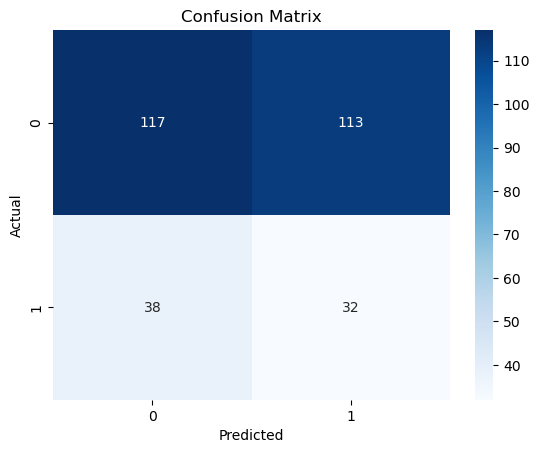

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.51      0.61       230
           1       0.22      0.46      0.30        70

    accuracy                           0.50       300
   macro avg       0.49      0.48      0.45       300
weighted avg       0.63      0.50      0.54       300



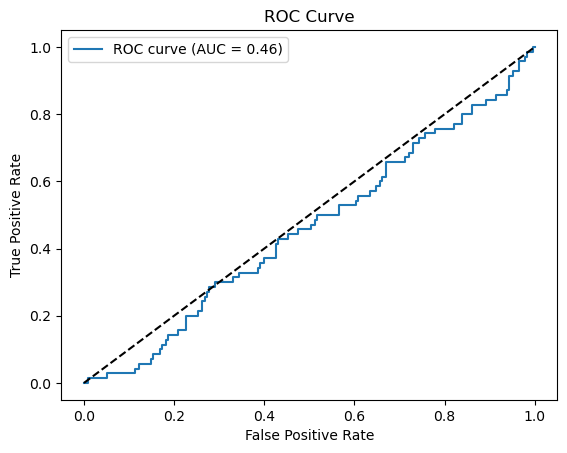

Most important features:
                        Feature  Coefficient
18  watch_time_group_Very High     0.632774
13            age_group_Senior     0.624675
15       age_group_Young Adult    -0.353806
1                          age    -0.319717
9          watch_per_fee_ratio    -0.316972
14              age_group_Teen    -0.313850
16        watch_time_group_Low    -0.305581
17     watch_time_group_Medium    -0.266702
12           age_group_Mid-age     0.259399
7                  monthly_fee    -0.189699


In [13]:
## TASK 5: Predictive Modelling
# Logistic Regression (Binary Classification)
# Build a logistic regression model to predict is_churned:
# ==============================
# Imports
# ==============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# Split Features and Target- Split into training and test sets (train_test_split())
# =====================================
X = df.drop('is_churned', axis=1)
y = df['is_churned']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# Identify column types
# =========================
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# =======================================================
# Preprocessing Pipelines- Scale features (StandardScaler
# =======================================================
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# ========================================
# Build Pipeline with Logistic Regression
# ========================================
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# ===============================================
# Fit the model- Fit a LogisticRegression() model
# ===============================================
model.fit(X_train, y_train)

# =================================================
# Predictions- • Predict probabilities and classes
# =================================================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ==============================
# Evaluation Metrics
# ==============================
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ==============================
# Feature Importance
# ==============================
coefficients = model.named_steps['classifier'].coef_[0]

num_features = numeric_cols
cat_features = model.named_steps['preprocessor'].named_transformers_['cat'] \
    .named_steps['onehot'].get_feature_names_out(categorical_cols)

all_features = np.concatenate([num_features, cat_features])

feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Most important features:\n", feature_importance.head(10))


Model Performance:
R² Score: -0.016
RMSE: 23.272



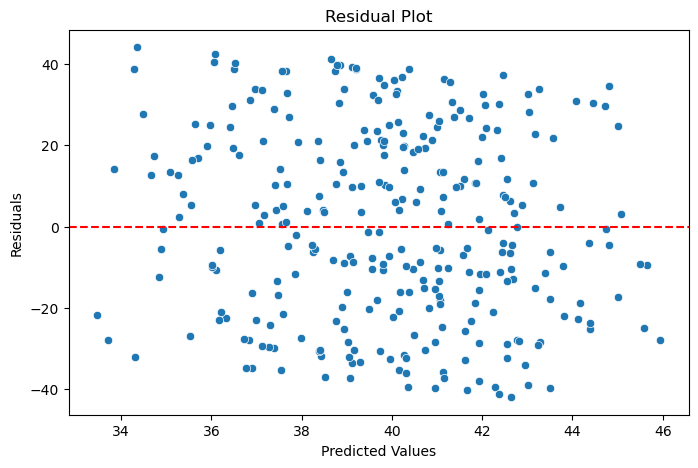

                       Feature  Coefficient
11                  country_UK     2.408416
10               country_India     1.261350
9              country_Germany     0.772155
3          received_promotions     0.709978
5   subscription_type_Standard     0.429791
12                 country_USA     0.148946
0                  monthly_fee     0.075071
2                  tenure_days    -0.004547
1         mobile_app_usage_pct    -0.010269
8               country_France    -0.626439
4    subscription_type_Premium    -0.959452
7                 gender_Other    -1.605118
6                  gender_Male    -4.715235
Business Insights: Impact of Features on Average Watch Hours
- country_UK increases average watch hours by 2.41
- country_India increases average watch hours by 1.26
- country_Germany increases average watch hours by 0.77
- received_promotions increases average watch hours by 0.71
- subscription_type_Standard increases average watch hours by 0.43
- country_USA increases average wat

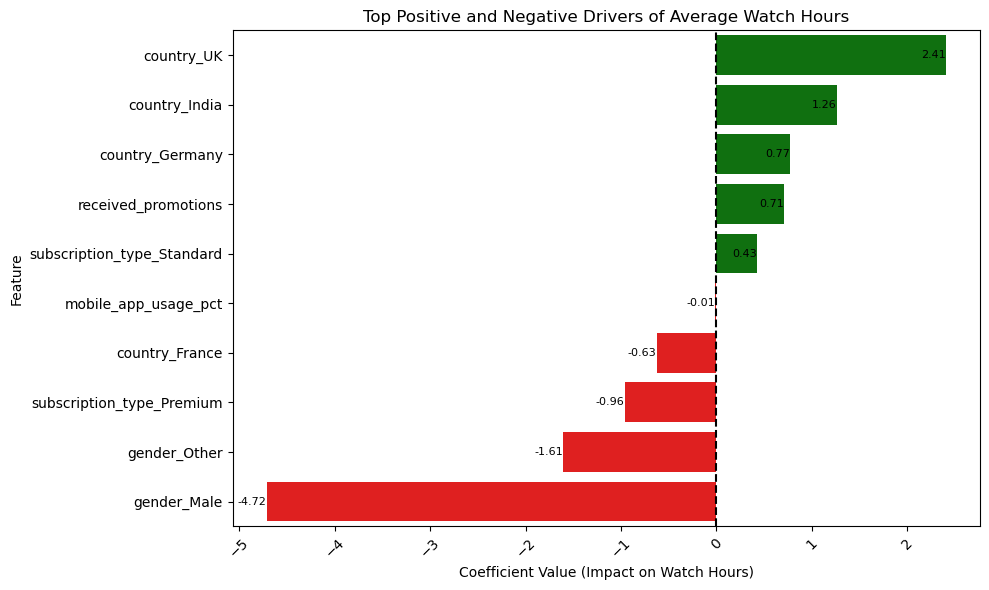

In [14]:
## TASK 5: Predictive Modelling
# Linear Regression (Continuous Prediction) - Predict average_watch_hours from user features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Select relevant features
# -----------------------------
features = [
    'monthly_fee', 
    'mobile_app_usage_pct', 
    'tenure_days', 
    'received_promotions',  
    'subscription_type_Premium',
    'subscription_type_Standard',
    'gender_Male',
    'gender_Other',
    'country_France',
    'country_Germany',
    'country_India',
    'country_UK',
    'country_USA'
]
target = 'average_watch_hours'

# -----------------------------
#  Features & Target
# -----------------------------
X = df[features]
y = df[target]

# Handle missing values
X = X.fillna(X.median())
y = y.fillna(y.median())

# -----------------------------
#  Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
#  Train Model
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
#  Predict & Evaluate
# -----------------------------
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}\n")

# -----------------------------
# Residual Plot
# -----------------------------
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# -----------------------------
# Coefficients & Insights
# -----------------------------
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_}).sort_values(by='Coefficient', ascending=False)
print(coeff_df)

# -----------------------------
# Business Insights
# -----------------------------
print("Business Insights: Impact of Features on Average Watch Hours")
for i, row in coeff_df.iterrows():
    if row['Coefficient'] > 0:
        print(f"- {row['Feature']} increases average watch hours by {row['Coefficient']:.2f}")
    elif row['Coefficient'] < 0:
        print(f"- {row['Feature']} decreases average watch hours by {abs(row['Coefficient']):.2f}")
    else:
        print(f"- {row['Feature']} has no impact on average watch hours")
        
# -----------------------------
# Top 5 Positive and Negative Features
# -----------------------------
top_positive = coeff_df.nlargest(5, 'Coefficient')
top_negative = coeff_df.nsmallest(5, 'Coefficient')
top_features = pd.concat([top_positive, top_negative])

# Visual Representation
top_features = pd.concat([top_positive, top_negative]).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=top_features,
    hue='Feature',
    legend=False,
    palette=['green' if c > 0 else 'red' for c in top_features['Coefficient']]
)
plt.axvline(0, color='black', linestyle='--')
plt.title("Top Positive and Negative Drivers of Average Watch Hours")
plt.xlabel("Coefficient Value (Impact on Watch Hours)")
plt.ylabel("Feature")
plt.xticks(rotation=45)

for i, v in enumerate(top_features['Coefficient']):
    plt.text(v, i, f"{v:.2f}", color='black', va='center', ha='right', fontsize=8)

plt.tight_layout()
plt.show()



Impact of Subscription Type on Average Watch Hours:
- subscription_type_Basic users are the baseline (0 hours difference)
- subscription_type_Standard users watch 0.65 hours more than Basic users
- subscription_type_Premium users watch 1.10 hours less than Basic users


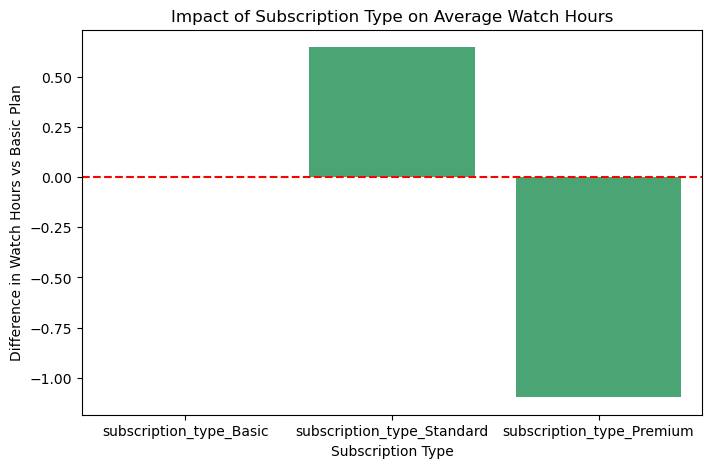

In [15]:
## TASK 5: Predictive Modelling
#Linear Regression (Continuous Prediction)
# Interpret coefficients for business insights i.e. impact of subscription type on watch hours

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Features: Only subscription type (one-hot encoded)
features = ['subscription_type_Standard', 'subscription_type_Premium']  # Baseline = Basic
target = 'average_watch_hours'

X = df[features].fillna(df[features].median())
y = df[target].fillna(df[target].median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
coeff_df = pd.DataFrame({
    'Subscription_Type': X.columns,
    'Coefficient': model.coef_
})

# Add baseline (Basic plan) with coefficient 0
coeff_df = pd.concat([pd.DataFrame({'Subscription_Type':['subscription_type_Basic'], 'Coefficient':[0]}), coeff_df], ignore_index=True)

# Print business insights
print("Impact of Subscription Type on Average Watch Hours:")
for i, row in coeff_df.iterrows():
    if row['Coefficient'] > 0:
        print(f"- {row['Subscription_Type']} users watch {row['Coefficient']:.2f} hours more than Basic users")
    elif row['Coefficient'] < 0:
        print(f"- {row['Subscription_Type']} users watch {abs(row['Coefficient']):.2f} hours less than Basic users")
    else:
        print(f"- {row['Subscription_Type']} users are the baseline (0 hours difference)")

# Visual Representation including Basic
plt.figure(figsize=(8,5))
sns.barplot(x='Subscription_Type', y='Coefficient', data=coeff_df, color='mediumseagreen')
plt.axhline(0, color='red', linestyle='--')
plt.title("Impact of Subscription Type on Average Watch Hours")
plt.ylabel("Difference in Watch Hours vs Basic Plan")
plt.xlabel("Subscription Type")
plt.show()
